In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

**1. Построить нормальное гауссово распределение для двух переменных: x, y. Нарисовать их на плоскости (scatter plot).**

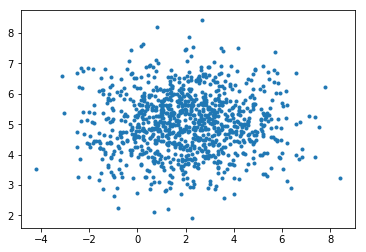

In [55]:
mu1 = 2.0
sigma1 = 2.0

mu2 = 5 
sigma2 = 1

amount = 1000


norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)


x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)

plt.scatter(x, y, marker='.')
plt.show()

**2. Нарисовать плотность распределения полученной выборки x.**

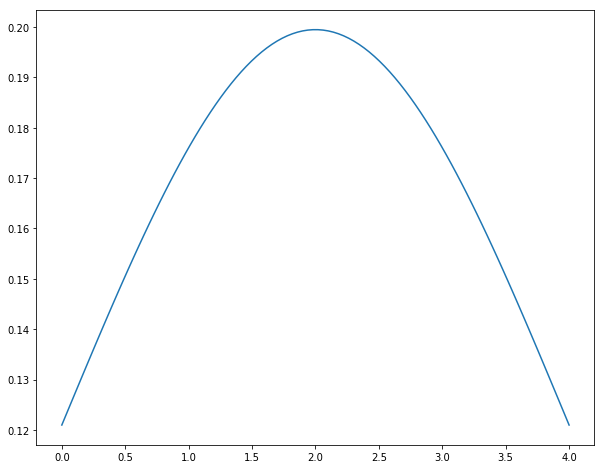

In [58]:
z = np.linspace(0,4,100)
pdf1 = norm_rv1.pdf(z)
plt.figure(figsize=(10,8))
plt.plot(z, pdf1)

**3. Изменить гауссово распределение с помощью матрицы масштабирования Scale = [[n, 0], [0, n]], где n - число, во сколько раз увеличиваем разброс данной выборки.**

Text(0.5, 1.0, 'data')

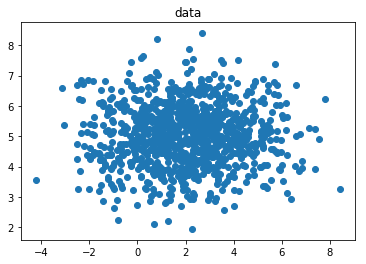

In [72]:
n = 10
scale = np.array([[n,0],[0,n]])
X = np.vstack((x,y)).T
plt.scatter(X[:, 0], X[:, 1])
plt.title('data')

In [62]:

def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

cov_mat(X.T) # (or with np.cov(X.T))

array([[4.0601855 , 0.04473929],
       [0.04473929, 0.998517  ]])

array([[406.01855029,   4.47392908],
       [  4.47392908,  99.85169978]])

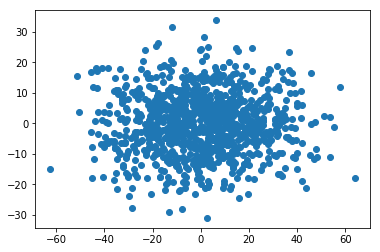

In [73]:
X = X - np.mean(X, 0)
Y = X.dot(scale)
plt.scatter(Y[:, 0], Y[:, 1])
cov_mat(Y.T)

**4. Построить график зависимости (корелляции) x от y.**

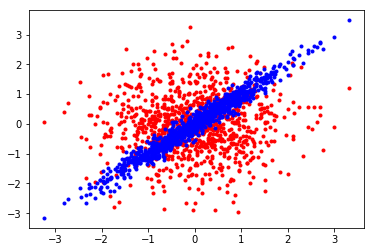

In [74]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

**6.Посчитать коэффициент Пирсона для переменных x, y. Что означает положительное значение коэффициента? Отрицательное? 0?**


0.02221971201967203


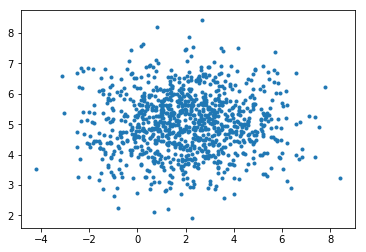

In [75]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print(corr)

чем ближе к 1 коэффициент Пирсона, тем выше зависимость двух переменных. Отрицательное значение означает обратную зависимость. Ноль означает отсутсвие зависимости

**7. Сгенерировать равномерное распределение на отрезке [1, 10]. Нарисовать график плотности распределения. Чем оно отличается от нормального?**

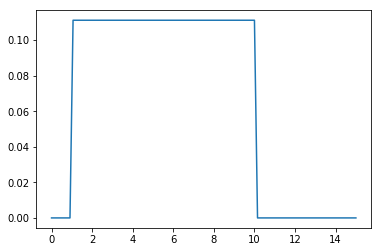

In [90]:
a = 1
b = 10

uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

x = np.linspace(0, 15, 100)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

Отличие в следующем: при равномерном распределении, возможные значения лежат в пределах определенного интервала (2,10); кроме того, что в пределах этого интервала все значения случайной величины одинаково вероятны (0.12).

**8.Найти на графике примеры выброса. Что они означают?
https://github.com/yustiks/statistics_in_python/blob/master/dz.ipynb**

(95;0) (81;40) (0;79) (10;83)
это значения, резко отличающиеся от других значений в данных. Выброс может указывать на аномалии в распределении данных или на ошибки при измерениях

**9 .Найти корелляцию в следующих данных:**


Корелляция между: 4046 - Total number of avocados with PLU 4046 sold и например Average Price.
Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

In [91]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [92]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['4046', 'AveragePrice']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])
tot4046 = df_norm[0]
avgprice = df_norm[1]

          0         1
0  0.000046  0.316726
1  0.000030  0.323843
2  0.000035  0.174377
3  0.000050  0.227758
4  0.000041  0.298932


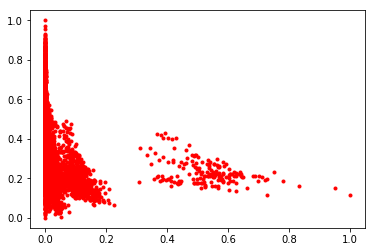

In [93]:
plt.plot(tot4046, avgprice, 'r.')

Корреляции нет, вроде как :)